In [1]:
import sys
sys.path.insert(1, '/Users/Andrew/Documents/PhD/Scripts/Python/pygplates_rev12')
import pygplates
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_zd = pd.read_csv('/Users/Andrew/Documents/PhD/Models/Supercontinent-data/Voice_2011-zircon/Voice-2011-zircon.csv')
df_al = pd.read_csv('/Users/Andrew/Documents/PhD/Models/Supercontinent-data/Cao_2017-arc_length/Cao-2017-arc-length.csv')
df_LIP = pd.read_csv('/Users/Andrew/Documents/PhD/Models/Supercontinent-data/LIP_database_Excel/Simple_table_ersnt_2013.csv')
df_rift = pd.read_csv('/Users/Andrew/Documents/PhD/Models/Supercontinent-data/Condie-2002-rifting-episodes.csv')
df_brad1 = pd.read_csv('/Users/Andrew/Documents/PhD/Models/Supercontinent-data/Bradley_2008/Bradley_table1.csv')
df_brad2 = pd.read_csv('/Users/Andrew/Documents/PhD/Models/Supercontinent-data/Bradley_2008/Bradley_table2.csv')
with open('cont_arc_length.pickle', 'rb') as handle:
    subduction_lengths = pickle.load(handle)

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
StepSize = 10
minTime = 0
maxTime = 1010
TimeArray = np.arange(minTime,maxTime,StepSize)

MarginLength1 = []
for time in TimeArray:
    
    valid_margins = df_brad1[(df_brad1.Oldest_age>=time) & (0<=time)]
    #print valid_margins
    MarginLength1.append(np.sum(valid_margins['Length']))

In [9]:
df_brad2 = df_brad2.loc[df_brad2['Quality'] != 'D'] #filter out poor quality 
df_brad2['Start date (Ma)'] = df_brad2['Start date (Ma)'].astype(int)
df_brad2['End date (Ma)'] = df_brad2['End date (Ma)'].astype(int)
df_brad2 = df_brad2.loc[df_brad2['Start date (Ma)'] < 1000]

In [10]:
df_brad2

,Number,Group,Margin and orogen,Where,Start date (Ma),End date (Ma),Lifespan (m.y.),Quality,High-P metamorphism?,Foredeep magmatism?,Length (km)
0,A1,1,Arctic Alaska microcontinent<comma> S side<com...,Alaska<comma> Russia,350,170,180,A,Y,N,1230
1,A2,1,Farewell terrane,Alaska,545,435,110,C,N,N,460
2,A3,1,Laurentian craton<comma> W side<comma> norther...,Canada,710,385,325,B,N,Y,1560
3,A4,1,Laurentian craton<comma> W side<comma> souther...,USA<comma> Canada,542,357,185,A,N,Y,1870
4,A5,1,Laurentian craton<comma> N side<comma> Innuiti...,Canada<comma> Greenland,620,444,180,C,N,N,1900
17,A18,1,Laurentian craton<comma> S side<comma> Ouachit...,USA,520,310,210,A,N,N,1720
18,A19 (a<comma> b),1,Laurentian craton<comma> E side<comma> Appalac...,USA<comma> Canada,540,465,75,A,Y,Y,3320
19,A20 (a<comma>b),1,Laurentian craton<comma> E side<comma> E Green...,Greenland<comma> Svalbard,815,444,370�_,C,Y,N,1740
20,A21,1,Baltic Craton<comma> W side<comma> Scandinavia...,Norway,605,505,100,A,Y,N,1550
24,A25,1,Baltic Craton<comma> E side<comma> Uralian oro...,Russia,477,376,101,A,N,N,3130


[0, 2030, 2030, 2910, 3990, 4780, 8410, 8800, 8950, 11250, 11250, 11250, 10860, 10860, 10860, 10860, 9800, 11030, 10240, 8860, 9360, 9910, 9910, 9850, 9780, 9780, 9780, 9280, 4520, 4520, 7170, 8410, 8410, 9790, 9790, 11270, 11910, 11350, 17500, 17570, 17020, 15940, 15940, 16890, 17910, 22880, 22880, 26200, 23500, 23500, 23500, 25340, 27010, 25290, 23960, 18850, 20650, 20650, 24055, 24805, 23135, 18835, 18835, 19135, 16025, 17247, 15547, 15547, 11515, 11515, 11515, 11515, 9755, 11215, 10525, 9445, 8885, 8885, 6685, 4510, 4510, 3950, 2210, 2210, 2210, 750, 750, 750, 750, 750, 750, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


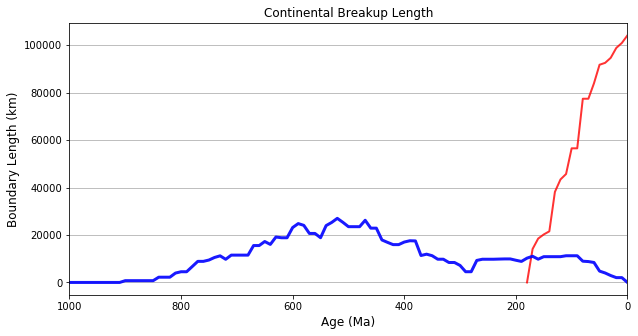

In [14]:
# Estimate the typical duration of a rift before breakup, in Myr
TypicalRiftDuration = 40

MarginLength2 = []
passive_margin_length = []
for time in TimeArray:
    #print df2['Start date (Ma)']>=time-TypicalRiftDuration
    #print 'two', df2['End date (Ma)']<=time
    valid_margins = df_brad2[(df_brad2['Start date (Ma)'] >= time) & (df_brad2['End date (Ma)'] <= time)]
    #valid_margins = df2[(df2['Start date (Ma)'])]
    #print df2['Start date (Ma)']<=time
    #print 'time = ',time
    #print valid_margins
    #print 'summed length = ', np.sum(valid_margins['Length (km)'])
    MarginLength2.append(np.sum(valid_margins['Length (km)']))
    
print MarginLength2

plt.figure(figsize=(10,5))
plt.plot(TimeArray[:19],MarginLength1[:19],'r',linewidth=2,alpha=0.8)
plt.plot(TimeArray,MarginLength2,'b',linewidth=3,alpha=0.9)
#plt.plot(TimeArray,np.asarray(MarginLength1)+np.asarray(MarginLength2),'gray',linewidth=2,alpha=0.2)

#plt.ylim((0,30000))
plt.ylabel('Boundary Length (km)',fontsize=12)
plt.xlim((1000,0))
plt.xlabel('Age (Ma)',fontsize=12)
plt.gca().yaxis.grid(True,which='major')
plt.title('Continental Breakup Length')

#plt.savefig('Bradley_FossilMarginBreakupAges.pdf')
#plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11818ac90>]], dtype=object)

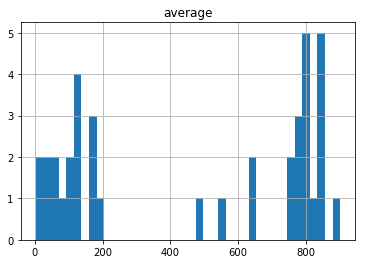

In [15]:
df_rift.hist('average', bins=40)

In [16]:
#for some reason there is a NaN row we need to drop...
df_rift = df_rift.drop(df_rift.index[-1])


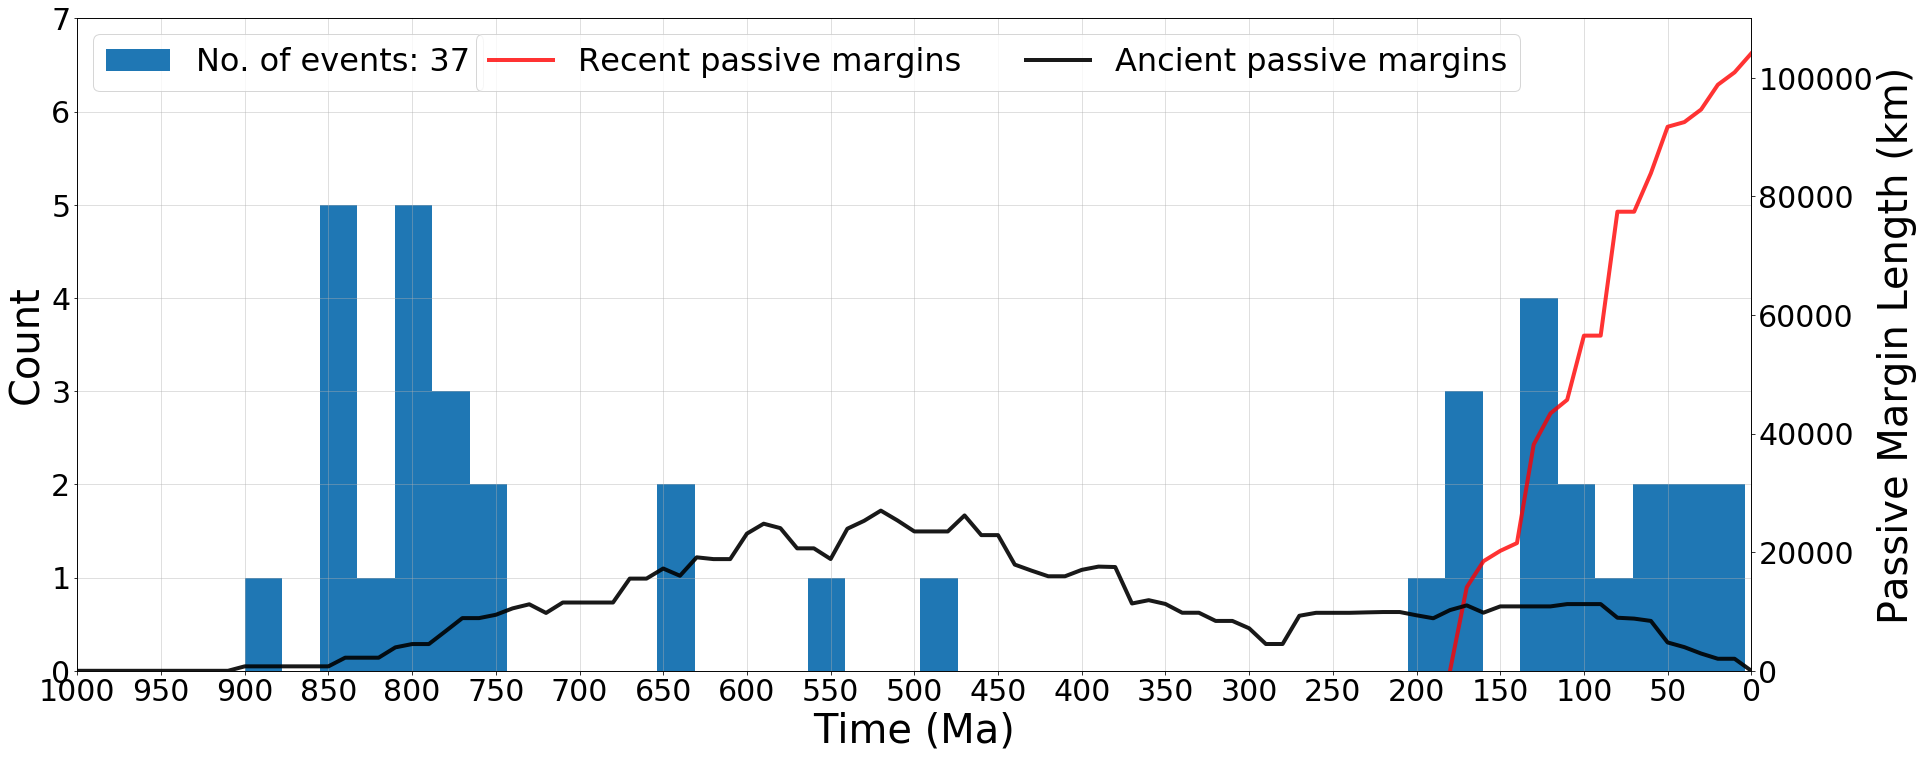

In [19]:
#df_rift.hist('average', bins=40)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(30,12),facecolor='w', edgecolor='k')
ax2 = ax1.twinx()
ax2.plot(TimeArray[:19],MarginLength1[:19],'r',linewidth=4,alpha=0.8, label='Recent passive margins')
ax2.plot(TimeArray,MarginLength2,'k',linewidth=4,alpha=0.9, label='Ancient passive margins')
ax1.hist(df_rift['average'], bins=40, label='No. of events: 37')
ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)
ax2.tick_params(axis='y', labelsize=30)
ax1.set_xlim(1000,0)
ax1.set_ylim(0,7)
ax2.set_ylim(0,110000)
ax1.set_ylabel('Count', fontsize=40)
ax1.set_xlabel('Time (Ma)', fontsize=40)
ax2.set_ylabel('Passive Margin Length (km)',fontsize=40)
ax1.set_xticks(np.arange(0,1050,50))
ax1.xaxis.grid(True, alpha=.5)
ax1.yaxis.grid(True, alpha=.5)
ax1.legend(loc='upper left',fontsize=32)
ax2.legend(loc='upper center',fontsize=32, ncol=2,bbox_to_anchor=(.55,1))
plt.savefig("Rift_1000-0_Condie-2002.pdf")

In [22]:
df_LIP

,Recorded age,Upper age,Lower age,Name,Location,Reference
0,5,7,3,Columbia River,North America,"Coble and Mahood, 2012"
1,30,32,28,Afro-Arabian,Arabian Pen. & Africa,"Beccaluva et al., 2009"
2,60,62,58,North Atlantic Igneous Province,Greenland/N. Canada & Europe (UK),"Jerram et al., 2009"
3,65,67,63,Deccan,India,"Hooper et al., 2010"
4,90,92,88,Caribbean-Colombian,Central America,"Hastie and Kerr, 2010"
5,90,92,88,Madagascar,Africa,"Ernst and Buchan, 2001"
6,90,92,88,HALIP,Circum-Arctic,"Jowitt et al., in press"
7,120,122,118,Whitsunday,Australia (east),"Pirajno and Hoatson, 2012"
8,130,132,128,Parana-Etendeka,South America & Africa,"Thiede and Vasconcelos, 2010"
9,130,132,128,Comei-Rajmahal,Greater India,"Zhu et al., 2009"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115efcf10>]], dtype=object)

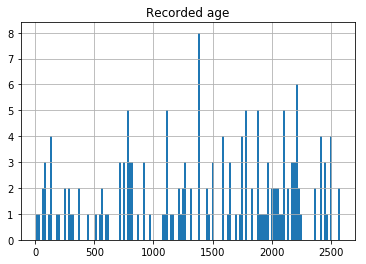

In [23]:
df_LIP.hist('Recorded age', bins=150)

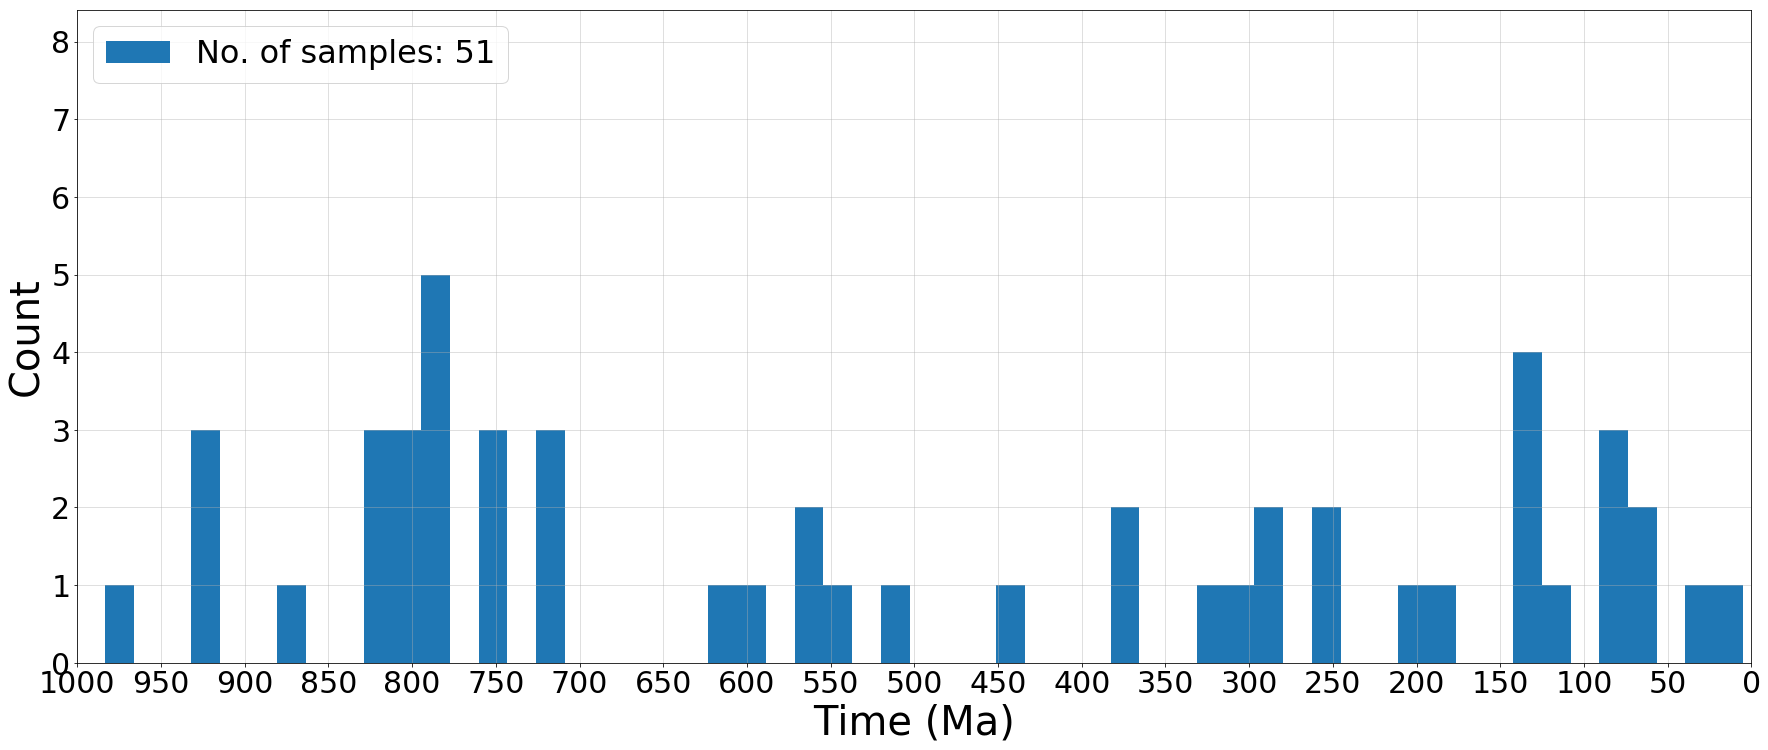

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,12),facecolor='w', edgecolor='k')
ax.hist(df_LIP['Recorded age'], bins=150, label='No. of samples: 51')
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.set_xlim(1000,0)
ax.set_ylabel('Count', fontsize=40)
ax.set_xlabel('Time (Ma)', fontsize=40)
ax.set_xticks(np.arange(0,1050,50))
ax.xaxis.grid(True, alpha=.5)
ax.yaxis.grid(True, alpha=.5)
ax.legend(loc='upper left',fontsize=32)
#plt.savefig("LIP_1000-0_Ernst-2013.pdf")

In [6]:
arc_length = []
for time in range(0,751,1):
    time_step_length = 0.
    for row, i in df_al.iterrows():
        #time_step_length = []
        if time < i['Onset time [Ma]'] and time >= i['Termination time [Ma]']:
            time_step_length += i['ave/pref. length [km]']
            #time_step_length.append(i['ave/pref. length [km]'])
            #print time_step_length
    arc_length.append(time_step_length)

#total_length += segment.get_arc_length() * pygplates.Earth.mean_radius_in_kms
  

In [27]:
len(arc_length)

751

In [4]:
plotting_times = range(0,751,1)
plotting_times2 = range(0,1010,10)

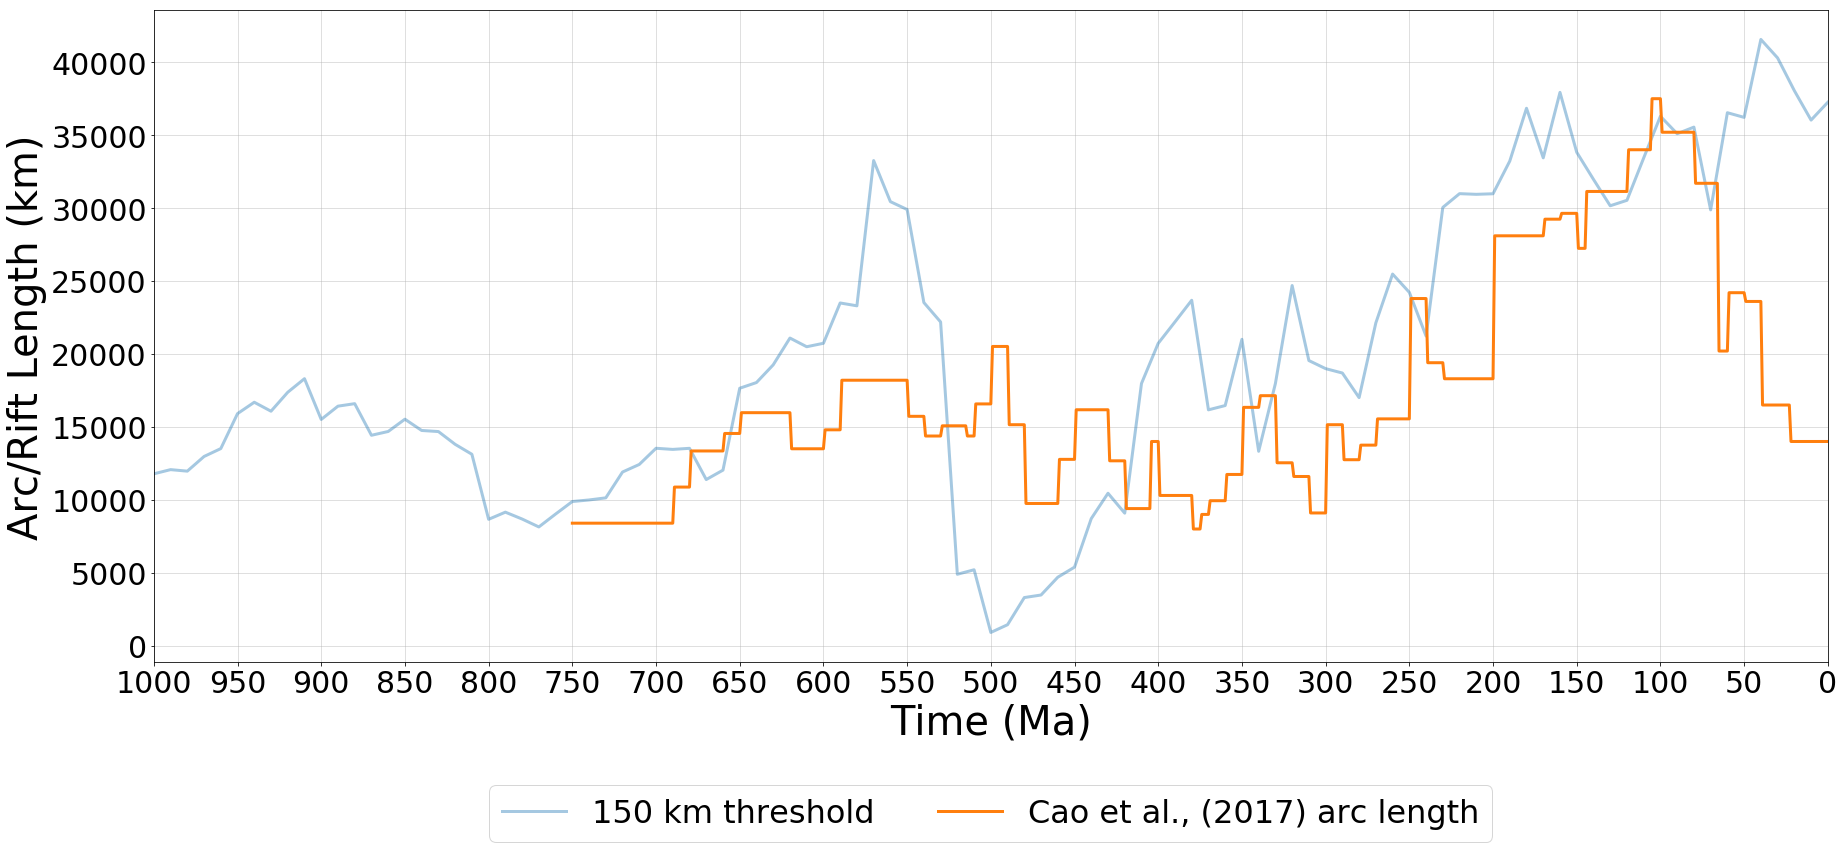

In [7]:
#plot arc length
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,12),facecolor='w', edgecolor='k')
#ax1.plot(plotting_times2, subduction_lengths[100], linewidth=3, alpha=0.4, label='100 km threshold')
ax.plot(plotting_times2, subduction_lengths[150], linewidth=3, alpha=0.4, label='150 km threshold')
#ax.plot(plotting_times2, subduction_lengths[300], linewidth=3, alpha=0.4, label='300 km threshold')
#ax.plot(plotting_times2, subduction_lengths['ocean'], linewidth=3, label='ocean arcs')
ax.plot(plotting_times, arc_length, linewidth=3, label='Cao et al., (2017) arc length')
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.set_xlim(1000,0)
ax.set_xlabel('Time (Ma)', fontsize=40)
ax.set_ylabel('Arc/Rift Length (km)', fontsize=40)
ax.set_xticks(np.arange(0,1050,50))
ax.xaxis.grid(True, alpha=.5)
ax.yaxis.grid(True, alpha=.5)
ax.legend(ncol=4,loc='lower center',bbox_to_anchor=(0.5,-.3),fontsize=32)
plt.savefig("Arc_length_1000-0.pdf")

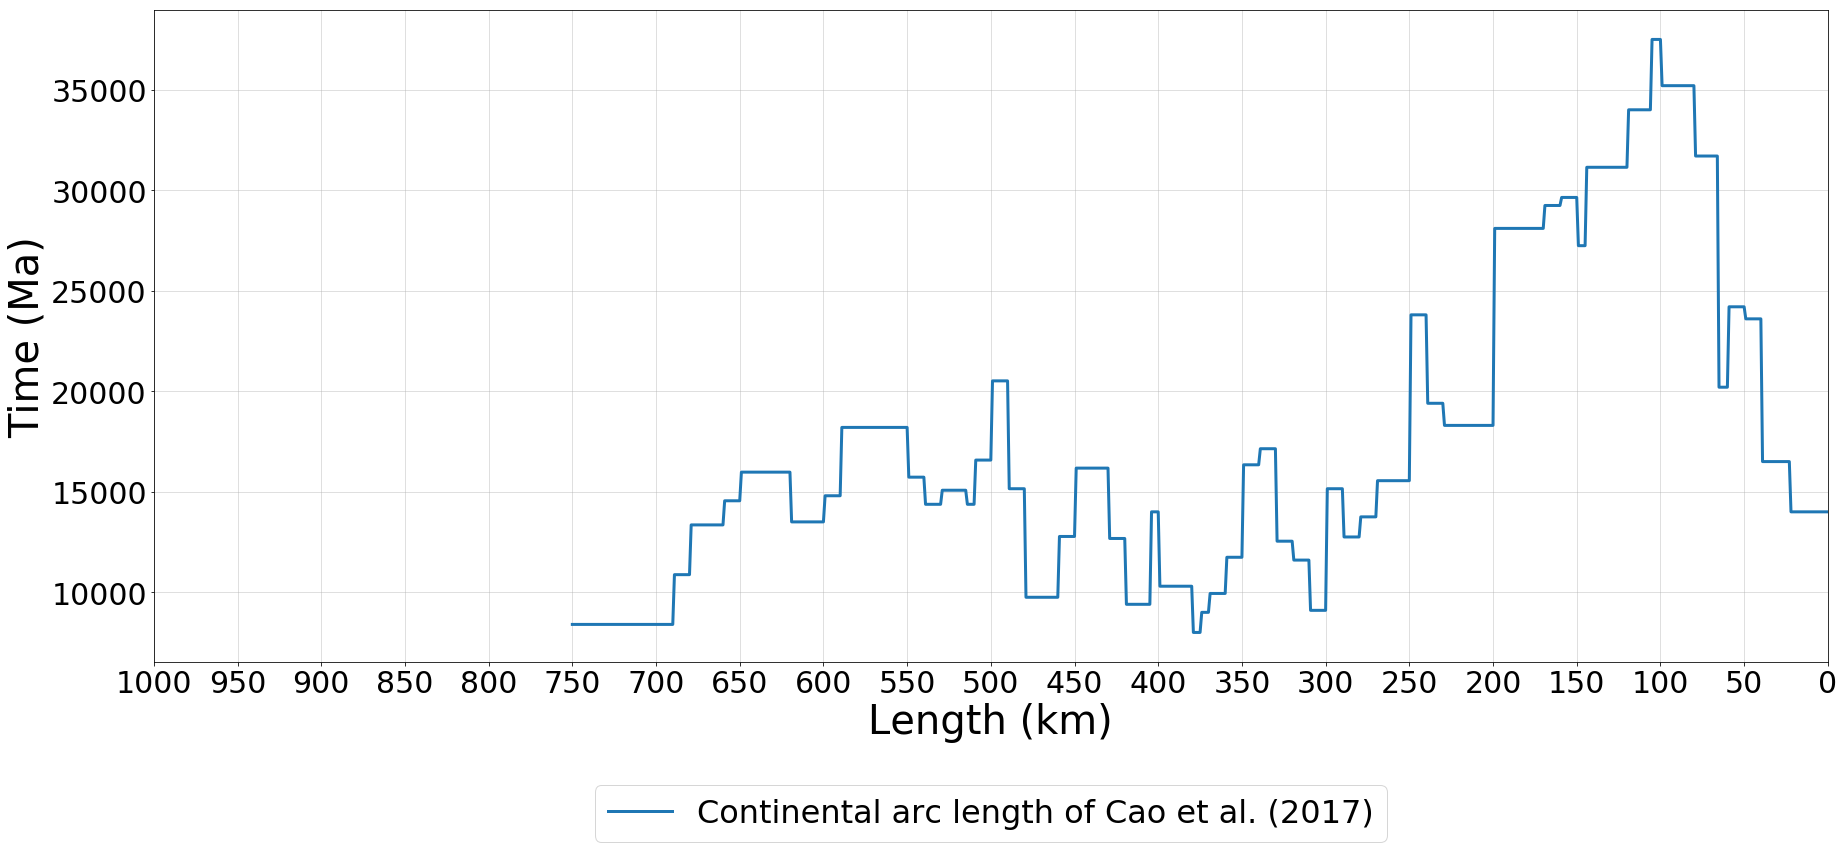

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,12),facecolor='w', edgecolor='k')
ax.plot(plotting_times,arc_length, linewidth=3, label='Continental arc length of Cao et al. (2017)')
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.set_xlim(1000,0)
ax.set_ylabel('Time (Ma)', fontsize=40)
ax.set_xlabel('Length (km)', fontsize=40)
ax.set_xticks(np.arange(0,1050,50))
ax.xaxis.grid(True, alpha=.5)
ax.yaxis.grid(True, alpha=.5)
ax.legend(loc='lower center',bbox_to_anchor=(0.5,-.3),fontsize=32)
#plt.savefig("Arc_length_750-0_Cao_2017.pdf", bbox_inches='tight')

In [67]:
df_z_age_d = df_zd.filter(items = ['best age 2 (Ma)'])
df_z_age_d = df_z_age_d[df_zd['best age 2 (Ma)'] < 1000]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123615190>]], dtype=object)

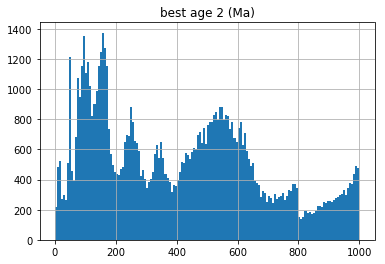

In [139]:
#quick plot of histogram
df_z_age_d.hist('best age 2 (Ma)', bins=150)

In [140]:
#convert to list for easier plotting
zircon_data_list = df_z_age_d['best age 2 (Ma)'].tolist()

In [191]:
len(zircon_data_list)

80338

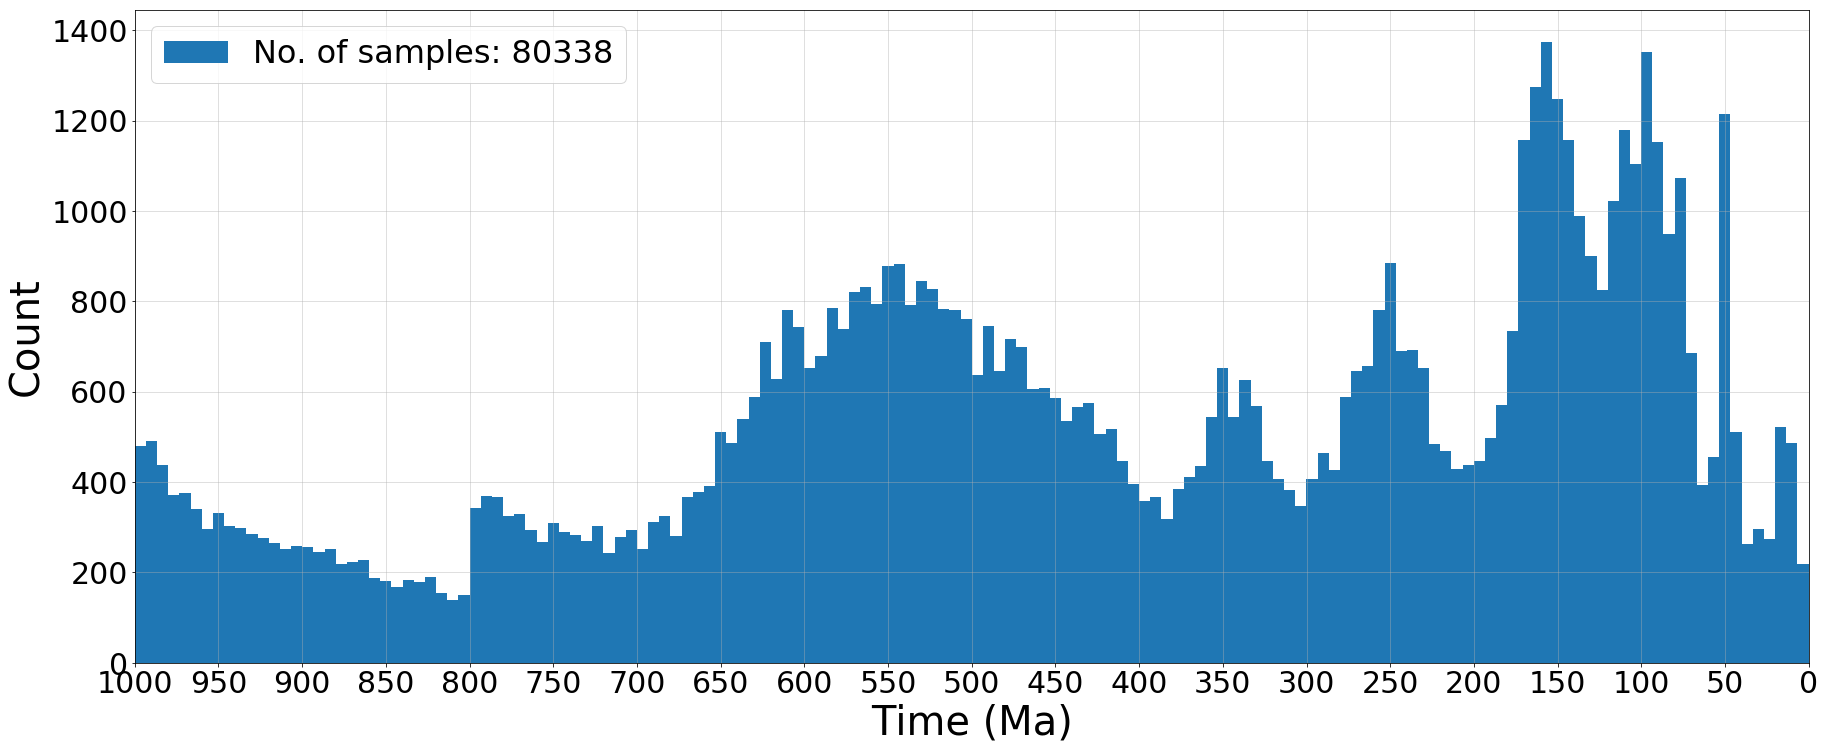

In [222]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,12),facecolor='w', edgecolor='k')
ax.hist(zircon_data_list, bins=150, label='No. of samples: 80338')
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.set_xlim(1000,0)
ax.set_ylabel('Count', fontsize=40)
ax.set_xlabel('Time (Ma)', fontsize=40)
ax.set_xticks(np.arange(0,1050,50))
ax.xaxis.grid(True, alpha=.5)
ax.yaxis.grid(True, alpha=.5)
ax.legend(loc='upper left',fontsize=32)
plt.savefig("Zircon_1000-0_Voice_2011.pdf")